 # Proyecto 3: Clustering
 ----
  
  University : UTEC \
  Course       : Machine Learning \
  Professor    : Cristian López Del Alamo 
  
 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Miguel Lama Carrasco(100%)
 - Integrante 2: Josue Arbulú Pastor(100%)
 - Integrante 3: Aaron SataMaria Gutierrez(100%)
 - Integrante 4: Lenin Chavez Zapata(100%)


 ----

## Importación de librerías

In [205]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import random_projection
import umap
import matplotlib.pyplot as plt
from scipy.stats import mode

## Procesar los features extraídos

### Obtener un feature vector por cada video y exportar csv

In [8]:
def process_video_data(features_path, labels_data):
    features_list = []
    labels_list = []
    urls_list = []
    empty_frame_count = 0
    empty_frame_ids = []

    for video_file in glob.glob(os.path.join(features_path, "*.npy")):
        video_id = os.path.basename(video_file).split("_")[0]
        feature_array = np.load(video_file)

        if feature_array.size == 0:
            empty_frame_count += 1
            empty_frame_ids.append(video_id)
            continue

        avg_feature = np.mean(feature_array, axis=0)
        features_list.append(avg_feature)

        label = labels_data[labels_data["youtube_id"] == video_id]["label"].values[0]
        labels_list.append(label)

        url = labels_data[labels_data["youtube_id"] == video_id]["youtube_id"].values[0]
        urls_list.append(url)

    print(f"Number of empty videos not included ({features_path}): {empty_frame_count}")
    print(f"Labels of empty videos not included: {empty_frame_ids}")

    stacked_features = np.vstack(features_list)
    stacked_labels = np.vstack(labels_list)
    stacked_urls = np.vstack(urls_list)

    features_df = pd.DataFrame(stacked_features)
    labels_df = pd.DataFrame(stacked_labels)
    urls_df = pd.DataFrame(stacked_urls, columns=["youtube_id"])

    return urls_df, features_df, labels_df

In [9]:

df_train_labels = pd.read_csv(
    "./url_data/train_subset_10.csv", header=None, names=["youtube_id", "label"]
)
df_val_labels = pd.read_csv(
    "./url_data/val_subset_10.csv", header=None, names=["youtube_id", "label"]
)
df_test_labels = pd.read_csv(
    "./url_data/test_subset_10.csv", header=None, names=["youtube_id", "label"]
)
df_train_labels.drop(index=df_train_labels.index[0], axis=0, inplace=True)
df_val_labels.drop(index=df_val_labels.index[0], axis=0, inplace=True)
df_test_labels.drop(index=df_test_labels.index[0], axis=0, inplace=True)

df_test_labels.head()

,youtube_id,label
1,oaVWnxlQOeo,NaN
2,7zMBk9Zu9fY,NaN
3,DwPEZeX5WkA,NaN
4,bO1MW9Lq9Sg,NaN
5,TdBpD9Ccg9w,NaN


In [10]:
models_r21d = ["r2plus1d_18_16_kinetics","r2plus1d_34_32_ig65m_ft_kinetics","r2plus1d_34_8_ig65m_ft_kinetics"]
for path in models_r21d:
    
    # train
    print("train")
    urls_train, X_train, Y_train = process_video_data(
    f"./numpy_data/train/r21d/{path}/", df_train_labels)
    urls_train.dropna(inplace=True)
    X_train.dropna(inplace=True)
    Y_train.dropna(inplace=True)
    train_data_extracted_df = pd.concat([urls_train, X_train, Y_train], axis=1)
    # Exportar a un archivo CSV
    train_data_extracted_df.to_csv(f'./csv_data/train_data_{path}.csv', index=False)
    print("")
    # val
    print("val")
    urls_val, X_val, Y_val = process_video_data(
    f"./numpy_data/val/r21d/{path}/", df_val_labels)
    urls_val.dropna(inplace=True)
    X_val.dropna(inplace=True)
    Y_val.dropna(inplace=True)
    val_data_extracted_df = pd.concat([urls_val, X_val, Y_val], axis=1)
    # Exportar a un archivo CSV
    val_data_extracted_df.to_csv(f'./csv_data/val_data_{path}.csv', index=False)
    print("")
    # test
    print("test")
    urls_test, X_test, Y_test = process_video_data(
    f"./numpy_data/test/r21d/{path}/", df_test_labels)
    urls_test.dropna(inplace=True)
    X_test.dropna(inplace=True)
    Y_test.dropna(inplace=True)
    test_data_extracted_df = pd.concat([urls_test, X_test], axis=1)
    # Exportar a un archivo CSV
    test_data_extracted_df.to_csv(f'./csv_data/test_data_{path}.csv', index=False)
    print("")

train
Number of empty videos not included (./numpy_data/train/r21d/r2plus1d_18_16_kinetics/): 1
Labels of empty videos not included: ['W6TspTTHpzA']

val
Number of empty videos not included (./numpy_data/val/r21d/r2plus1d_18_16_kinetics/): 0
Labels of empty videos not included: []

test
Number of empty videos not included (./numpy_data/test/r21d/r2plus1d_18_16_kinetics/): 0
Labels of empty videos not included: []

train
Number of empty videos not included (./numpy_data/train/r21d/r2plus1d_34_32_ig65m_ft_kinetics/): 6
Labels of empty videos not included: ['EQULJzMzmeM', 'W6TspTTHpzA', '-reNwipPPdQ', 'oRwkPwoFIL8', 'yqJXWU8BXEQ', 'B3L0x-AsCZ4']

val
Number of empty videos not included (./numpy_data/val/r21d/r2plus1d_34_32_ig65m_ft_kinetics/): 0
Labels of empty videos not included: []

test
Number of empty videos not included (./numpy_data/test/r21d/r2plus1d_34_32_ig65m_ft_kinetics/): 1
Labels of empty videos not included: ['se3ihwZ56Uw']

train
Number of empty videos not included (./nump

### Obtener la data de entrenamiento, validación y de testeo

In [12]:
urls_train, X_train, Y_train = process_video_data(
    f"./numpy_data/train/r21d/{models_r21d[2]}/", df_train_labels
)

urls_train.dropna(inplace=True)
X_train.dropna(inplace=True)
Y_train.dropna(inplace=True)

print(f"\nNúmero de videos cargados para entrenamiento: {len(X_train)}")
print(f"Shape de nuestra matriz de videos para entrenamiento: {X_train.shape}")


Number of empty videos not included (./numpy_data/train/r21d/r2plus1d_34_8_ig65m_ft_kinetics/): 0
Labels of empty videos not included: []

Número de videos cargados para entrenamiento: 5415
Shape de nuestra matriz de videos para entrenamiento: (5415, 512)


In [13]:
urls_val, X_val, Y_val = process_video_data(
    f"./numpy_data/val/r21d/{models_r21d[2]}/", df_val_labels
)

urls_val.dropna(inplace=True)
X_val.dropna(inplace=True)
Y_val.dropna(inplace=True)

print(f"\nNúmero de videos cargados para validación: {len(X_val)}")
print(f"Shape de nuestra matriz de videos para validación: {X_val.shape}")


Number of empty videos not included (./numpy_data/val/r21d/r2plus1d_34_8_ig65m_ft_kinetics/): 0
Labels of empty videos not included: []

Número de videos cargados para validación: 426
Shape de nuestra matriz de videos para validación: (426, 512)


In [14]:
urls_test, X_test, Y_test = process_video_data(
    f"./numpy_data/test/r21d/{models_r21d[2]}/", df_test_labels
)
urls_test.dropna(inplace=True)
X_test.dropna(inplace=True)
Y_test.dropna(inplace=True)

print(f"\nNúmero de videos cargados para testeo: {len(X_test)}")
print(f"Shape de nuestra matriz de videos para testeo: {X_test.shape}")

Number of empty videos not included (./numpy_data/test/r21d/r2plus1d_34_8_ig65m_ft_kinetics/): 0
Labels of empty videos not included: []

Número de videos cargados para testeo: 805
Shape de nuestra matriz de videos para testeo: (805, 512)


## Preprocesamiento de la data

### Escalar los datos

In [17]:
Scaler = PowerTransformer(method="yeo-johnson") # Utilizaremos el PowerTransformer para asemejar la data a una forma gaussiana
X_train_s = Scaler.fit_transform(X_train)
X_val_s = Scaler.transform(X_val)
X_test_s = Scaler.transform(X_test)


### Reduce dimensionality

#### Random Projection

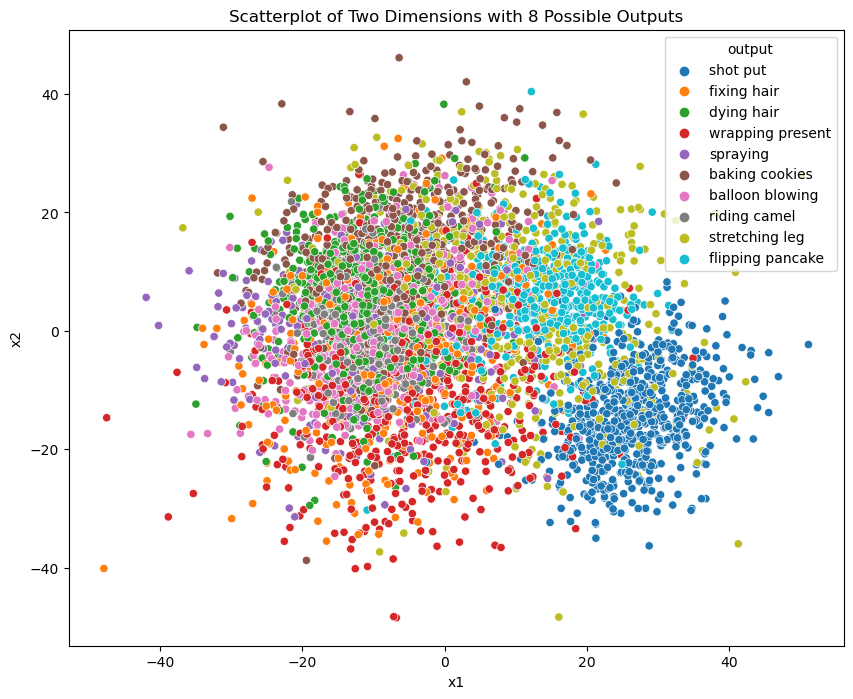

In [183]:
RP = random_projection.GaussianRandomProjection(n_components=2,random_state=42)
X_train_rp = RP.fit_transform(X_train_s)
X_val_rp = RP.transform(X_val_s)
X_test_rp = RP.transform(X_test_s)
X_train_rp.shape
df_ = pd.concat([pd.DataFrame(X_train_rp), Y_train], axis = 1)
df_.columns = ["x1","x2","output"]
# Crear el scatterplot con Seaborn
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(data=df_, x='x1', y='x2', hue='output')
plt.title('Scatterplot of Two Dimensions with 8 Possible Outputs')
plt.show()

#### UMAP

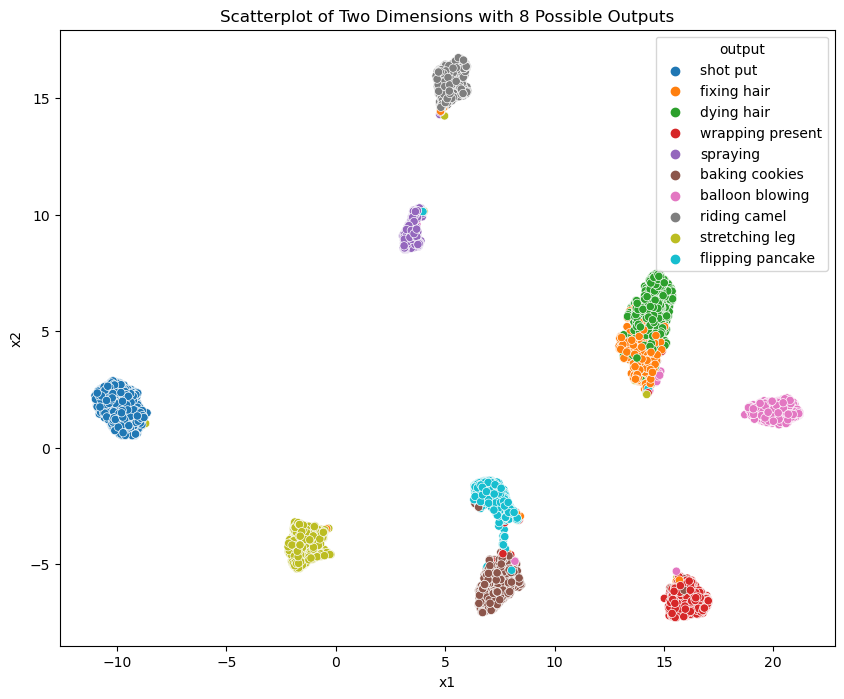

In [185]:
UMAP = umap.UMAP()
X_train_umap = UMAP.fit_transform(X_train_s)
X_val_umap = UMAP.transform(X_val_s)
X_test_umap = UMAP.transform(X_test_s)
X_train_umap.shape
df_ = pd.concat([pd.DataFrame(X_train_umap), Y_train], axis = 1)
df_.columns = ["x1","x2","output"]
# Crear el scatterplot con Seaborn
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(data=df_, x='x1', y='x2', hue='output')
plt.title('Scatterplot of Two Dimensions with 8 Possible Outputs')
plt.show()

#### PCA

(5415, 100)


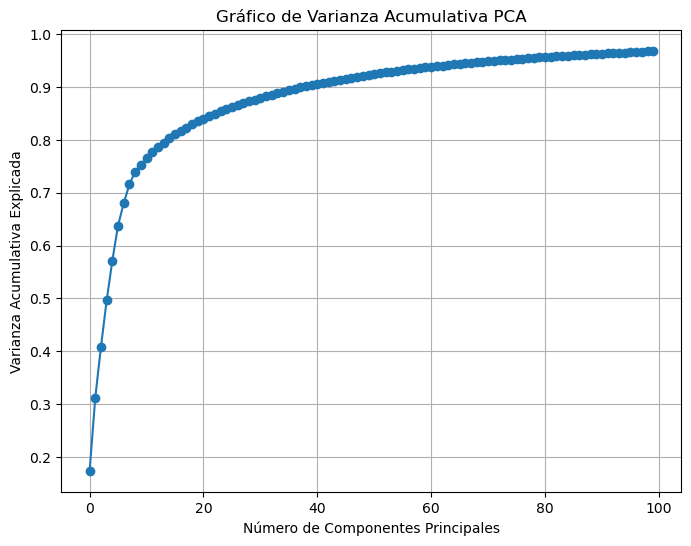

In [186]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

explained_variance = pca.explained_variance_ratio_
# Assuming 'explained_variance' is already defined
cumulative_variance = np.cumsum(explained_variance)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, 100), cumulative_variance[:100], marker='o', linestyle='-')
plt.title('Gráfico de Varianza Acumulativa PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulativa Explicada')
plt.grid(True)
plt.show()

## Clustering

### Kmeans

#### Train

In [197]:
unique_values = np.unique(Y_train)
num_unique_values = len(unique_values)
print("Number of unique values in Y_train:", num_unique_values)

kmeans = KMeans(n_clusters=num_unique_values, random_state=0, n_init="auto").fit(X_train_umap)
le = LabelEncoder()

train_pred = kmeans.labels_
train_labels = le.fit_transform(np.array(Y_train).reshape(Y_train.shape[0]))

print(real_labels)



Number of unique values in Y_train: 10
[6 3 3 ... 9 7 0]


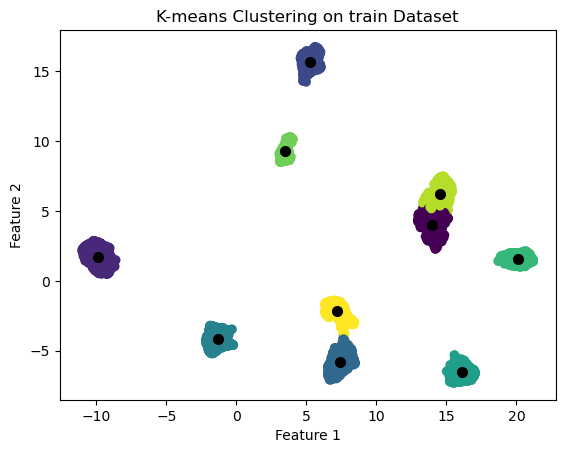

In [215]:
# Plot the data points and their cluster assignments
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=train_pred, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='.', color='black', s=100 , linewidths=3)
# Set light blue background 

ax.set_title("K-means Clustering on train Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

plt.show()

#### Val

In [201]:
val_pred = kmeans.predict(X_val_umap)
val_labels = le.fit_transform(np.array(Y_val).reshape(Y_val.shape[0]))

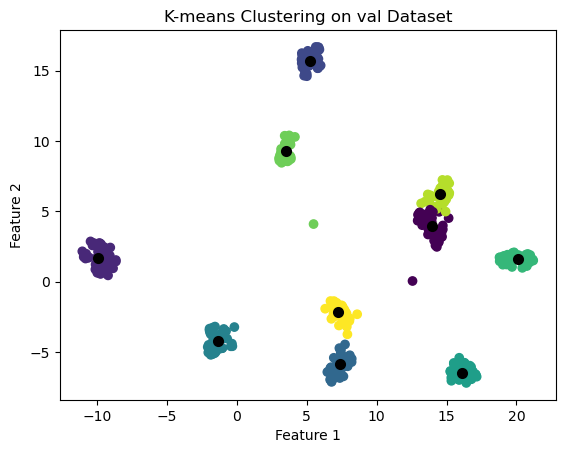

In [217]:
# Plot the data points and their cluster assignments
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_val_umap[:, 0], X_val_umap[:, 1], c=val_pred, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='.', color='black', s=100 , linewidths=3)
# Set light blue background 

ax.set_title("K-means Clustering on val Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

plt.show()

#### Results

In [219]:
print(adjusted_rand_score(val_labels, val_pred))
print(silhouette_score(X_val_umap, val_pred))

0.8721913170621148
0.7693507


### Dbscan

### Gaussian-Mixture